In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Load the training data from the first CSV file
train_data = pd.read_csv(r"C:\Users\KIIT\Desktop\Iterations\iter3\Combined_6.csv")

# Split the features and target variable
X_train = train_data.drop('Facies', axis=1)
y_train = train_data['Facies']

# Load the test data from the unlabelled CSV file
unlabelled_data = pd.read_csv(r"C:\Users\KIIT\Desktop\las to csv\SB-2.csv")

# Keep a copy of the unlabelled data
labelled_data = unlabelled_data.copy()

# Remove the 'Facies' column from the unlabelled data
unlabelled_data.drop('Facies', axis=1, inplace=True)

# Define the parameters for the gradient boosting classifier
params = {
    'n_estimators': 163,
    'learning_rate': 0.016258128550853512,
    'max_depth': 53,
    'min_samples_split': 203,
    'min_samples_leaf': 205,
    'subsample': 0.9990808801724966
}

# Create a gradient boosting classifier object with the defined parameters
gb_classifier = GradientBoostingClassifier(**params)

# Train the classifier on the original training data
gb_classifier.fit(X_train, y_train)

# Load the test data from another CSV file
test_data = pd.read_csv(r"C:\Users\KIIT\Desktop\SB-10.csv")

# Split the features and target variable for the test data
X_test = test_data.drop('Facies', axis=1)
y_test = test_data['Facies']

# Predict on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

# Get predicted probabilities for the test data
y_prob = gb_classifier.predict_proba(X_test)

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

# Print the area under the ROC curve
print("Area Under ROC Curve:", roc_auc)

# Use the trained classifier to predict labels for the unlabelled data
predicted_labels = gb_classifier.predict(unlabelled_data)

# Add the predicted labels to the labelled data
labelled_data['Facies'] = predicted_labels

# Store the labelled data in a new CSV file
labelled_data.to_csv(r"C:\Users\KIIT\Desktop\Iterations\iter3\L_SB-2.csv", index=False)


Accuracy: 0.9277456647398844
Area Under ROC Curve: 0.9876873323835922


In [2]:
import csv
import os

# Path to the folder containing CSV files
folder_path = r"C:\Users\KIIT\Desktop\Iterations\iter3"


# Get a list of all CSV files in the folder
file_list = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

# Initialize a list to store the combined data
combined_data = []

# Iterate over each CSV file and append its data to the combined list
for file in file_list:
    file_path = os.path.join(folder_path, file)
    with open(file_path, "r") as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)  # Read the header
        for row in reader:
            combined_data.append(row)

# Path and filename for the combined CSV file
combined_file_path = r"C:\Users\KIIT\Desktop\Iterations\iter3\Combined_7.csv"

# Write the combined data to a new CSV file
with open(combined_file_path, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header)  # Write the header
    writer.writerows(combined_data)  # Write the data rows

print("CSV files combined successfully!")

CSV files combined successfully!


Accuracy: 0.9248554913294798
Confusion Matrix:
[[503   0   2   1   9]
 [  6  36   0   3   3]
 [  0   0   9   0   0]
 [ 12   2   1  25   0]
 [ 13   0   0   0  67]]
Area Under ROC Curve: 0.988013059012739


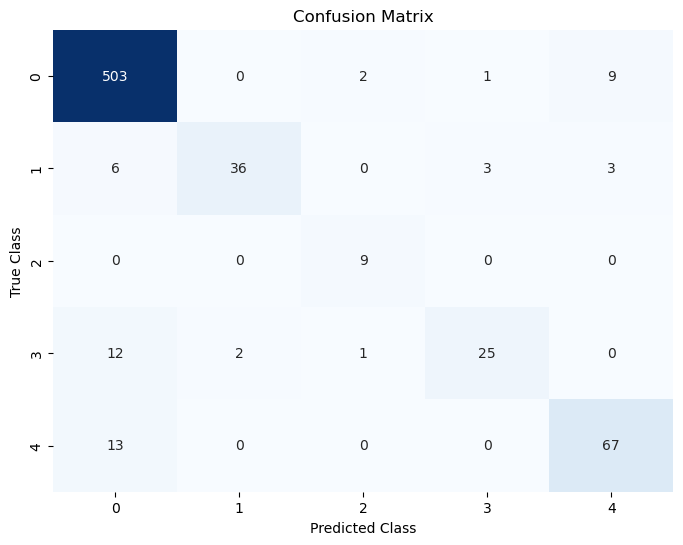

In [3]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data from the first CSV file
train_data = pd.read_csv(r"C:\Users\KIIT\Desktop\Iterations\iter3\Combined_7.csv")

# Split the features and target variable
X_train = train_data.drop('Facies', axis=1)
y_train = train_data['Facies']

# Load the test data from the second CSV file
test_data = pd.read_csv(r"C:\Users\KIIT\Desktop\SB-10.csv")

# Split the features and target variable
X_test = test_data.drop('Facies', axis=1)
y_test = test_data['Facies']

# Define the parameters for the gradient boosting classifier
params = {
    'n_estimators': 163,
    'learning_rate': 0.016258128550853512,
    'max_depth': 53,
    'min_samples_split': 203,
    'min_samples_leaf': 205, 
    'subsample': 0.9990808801724966
}

# Create a gradient boosting classifier object with the defined parameters
gb_classifier = GradientBoostingClassifier(**params)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Get predicted probabilities
y_prob = gb_classifier.predict_proba(X_test)

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

# Print the area under the ROC curve
print("Area Under ROC Curve:", roc_auc)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()